In [1]:
import numpy as np
import tensorflow as tf 
import tensorflow_datasets as tfds
import math 

import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
data ,metadata= tfds.load('fashion_mnist', as_supervised=True,with_info=True)

In [3]:
num_train = metadata.splits['train'].num_examples
num_test = metadata.splits['test'].num_examples
print(" {} train examples".format(num_train))
print(" {} test examples".format(num_test))

 60000 train examples
 10000 test examples


In [4]:
train_data , test_data = data['train'], data['test']

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [6]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

In [7]:
train_data = train_data.map(normalize)
test_data = test_data.map(normalize)


# train_data = train_data.cache()
# test_data = test_data.cache()

In [8]:
BATCH_SIZE = 32

train_data= train_data.cache().repeat().shuffle(num_train).batch(BATCH_SIZE)
test_data = test_data.cache().batch(BATCH_SIZE)

In [9]:
checkpoint_path = 'fashion_mnist/cp.ckpt'

In [10]:
l0 = tf.keras.layers.Flatten(input_shape=(28,28,1))
l1 = tf.keras.layers.Dense(units=128, activation=tf.nn.relu)
l2 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)

model = tf.keras.Sequential([l0,l1,l2])

model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [11]:
loss, acc = model.evaluate(test_data,steps=math.ceil(num_test/BATCH_SIZE), verbose=2)

313/313 - 3s - loss: 2.5808 - accuracy: 0.1179


In [12]:
print ("untrained model accuracy {}".format(acc))

untrained model accuracy 0.11789999902248383


## Load the Model 

In [13]:
model.load_weights(checkpoint_path)

In [14]:
loss, acc = model.evaluate(test_data,steps=math.ceil(num_test/BATCH_SIZE), verbose=2)
print ("Trained model accuracy {}".format(acc))

313/313 - 0s - loss: 0.3409 - accuracy: 0.8880
Trained model accuracy 0.8880000114440918


## Make Prediction and Explore  

In [15]:
for images, labels in test_data.take(1):
    
    images = images.numpy()
    labels = labels.numpy()
    
    predictions = model.predict(images)

In [16]:
predictions[0]

array([2.78231914e-06, 3.56280196e-07, 4.54229638e-02, 1.27746816e-07,
       7.98896134e-01, 3.82558433e-13, 1.55677676e-01, 5.29374331e-12,
       1.32310145e-08, 1.54688014e-08], dtype=float32)

In [17]:
print("Prediction {} | Actual Label {} ".format(np.argmax(predictions[0]), labels[0]))

Prediction 4 | Actual Label 4 


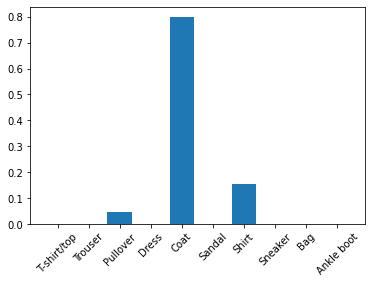

In [18]:

plt.bar(range(10),predictions[0])
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [19]:
img = images[0]
img.shape

(28, 28, 1)

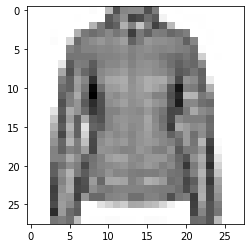

In [20]:
img = img.reshape(28,28)
plt.imshow(img, cmap=plt.cm.binary)
plt.show()